# Imports and Installation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support,
    accuracy_score
)


In [36]:
!pip install ucimlrepo

# Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
vertebral_column = fetch_ucirepo(id=212) 
  
# data (as pandas dataframes) 
X = vertebral_column.data.features 
y = vertebral_column.data.targets 
  
# metadata 
print(vertebral_column.metadata) 
  
# variable information 
print(vertebral_column.variables) 


{'uci_id': 212, 'name': 'Vertebral Column', 'repository_url': 'https://archive.ics.uci.edu/dataset/212/vertebral+column', 'data_url': 'https://archive.ics.uci.edu/static/public/212/data.csv', 'abstract': 'Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 310, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2005, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5K89B', 'creators': ['Guilherme Barreto', 'Ajalmar Neto'], 'intro_paper': None, 'additional_info': {'summary': "Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied R

In [4]:
import pandas as pd

# Create a DataFrame for features (X) and keep only the 'class' column from the targets (y)
df_features = pd.DataFrame(X)  # Load feature data
df_target = pd.DataFrame(y, columns=['class'])  # Load target column as 'class'

# Concatenate only the target column 'class' to the features
df = pd.concat([df_features, df_target], axis=1)

# Display the DataFrame
print(df)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis   class  
0        98.672917                 -0.254400

# Binary Classification

In [5]:
# Map the target classes to binary categories: 'Normal' and 'Abnormal'
df_target['class'] = df_target['class'].replace({
    'Hernia': 'Abnormal',
    'Spondylolisthesis': 'Abnormal'
})

# Concatenate features and modified target
df = pd.concat([df_features, df_target], axis=1)

# Display the resulting DataFrame to confirm the target classes
print(df['class'].value_counts())
print(df)


class
Abnormal    210
Normal      100
Name: count, dtype: int64
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylo

# Pre-Processing and Exploratory data analysis:

In [6]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
print(df['class'].unique())


['Abnormal' 'Normal']


In [8]:
# Convert the target column 'class' to binary values: assign 1 to the first unique class label 
df['class'] = np.where(df['class'] == df['class'].unique()[0], 1, 0)


In [9]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


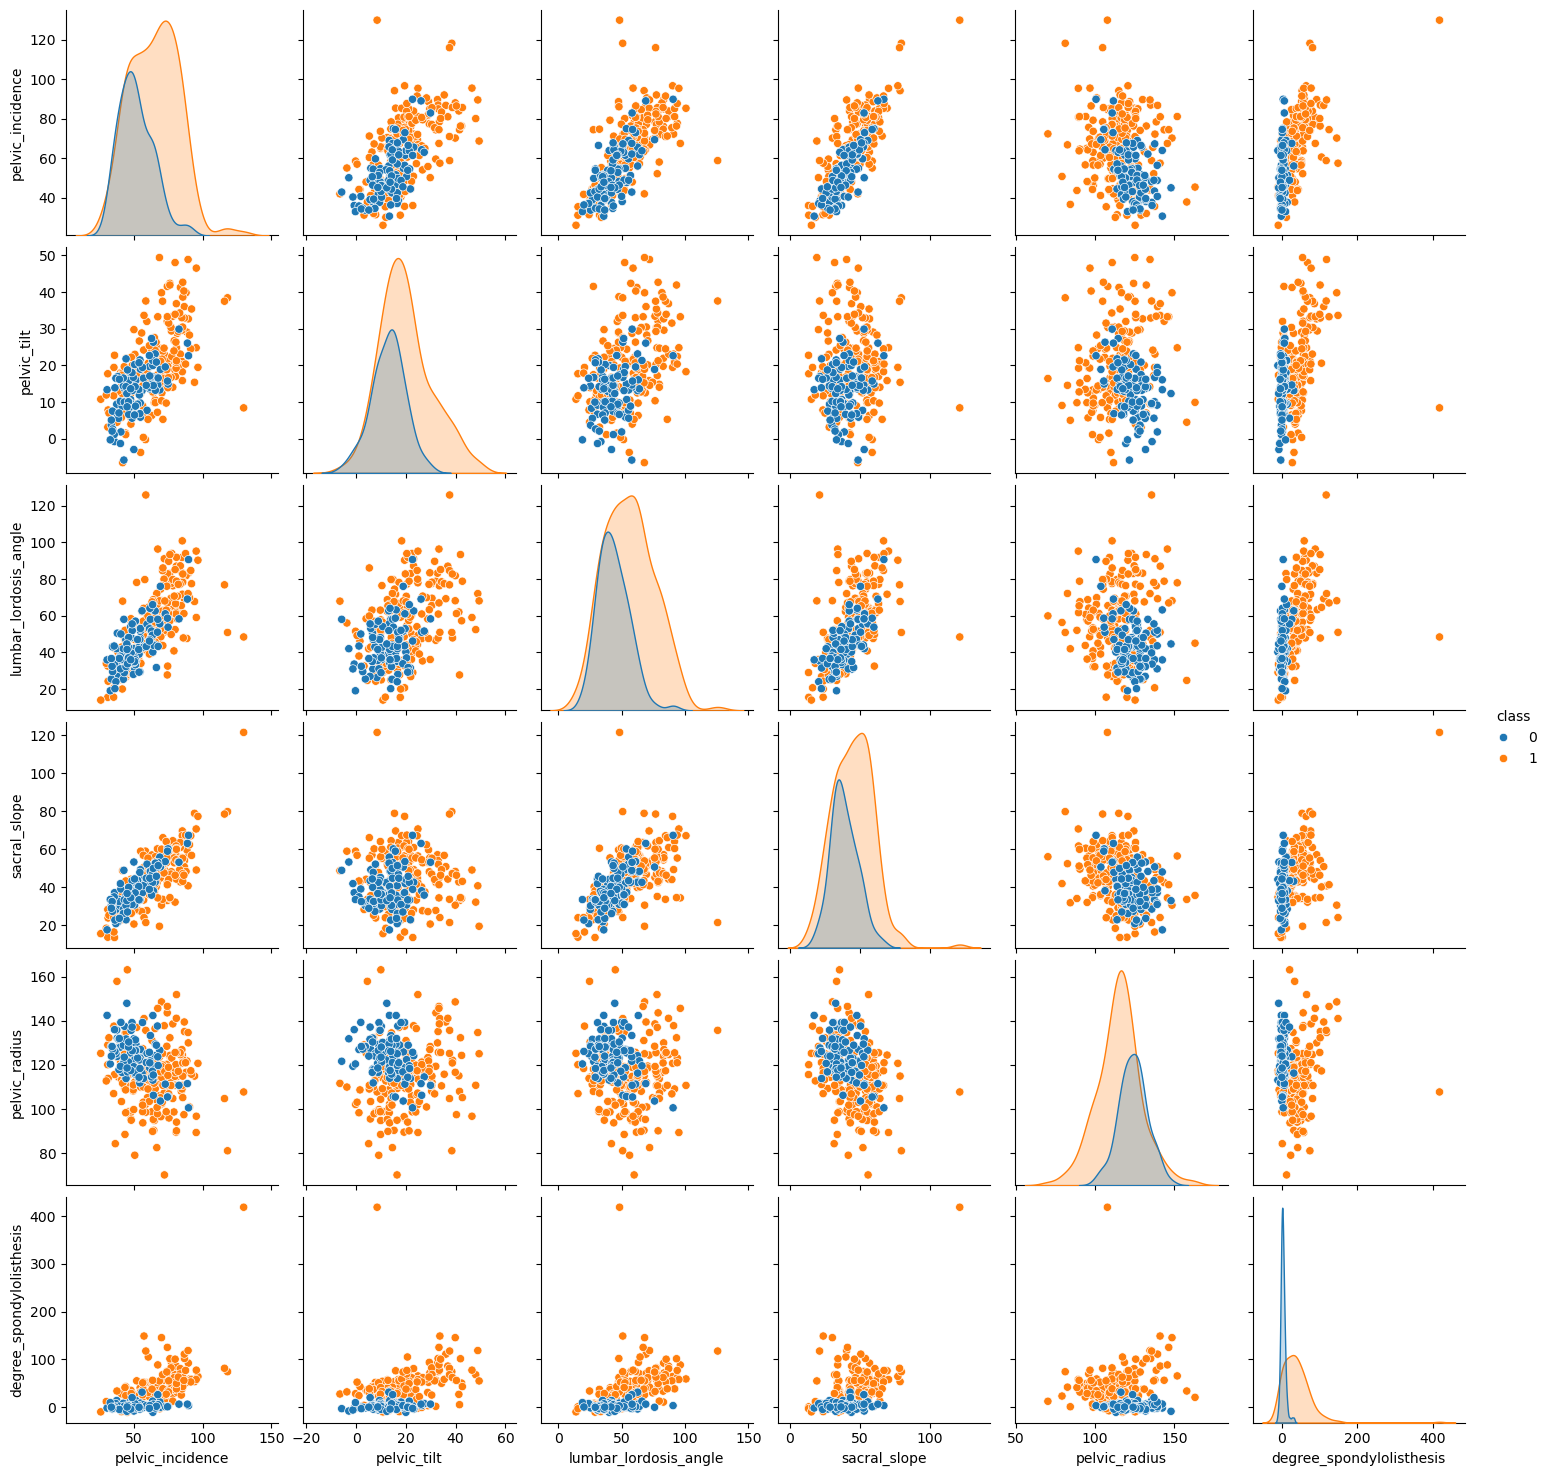

In [10]:
#scatterplots of the independent variables in the dataset
sns.pairplot(data=df, hue='class')
plt.show()


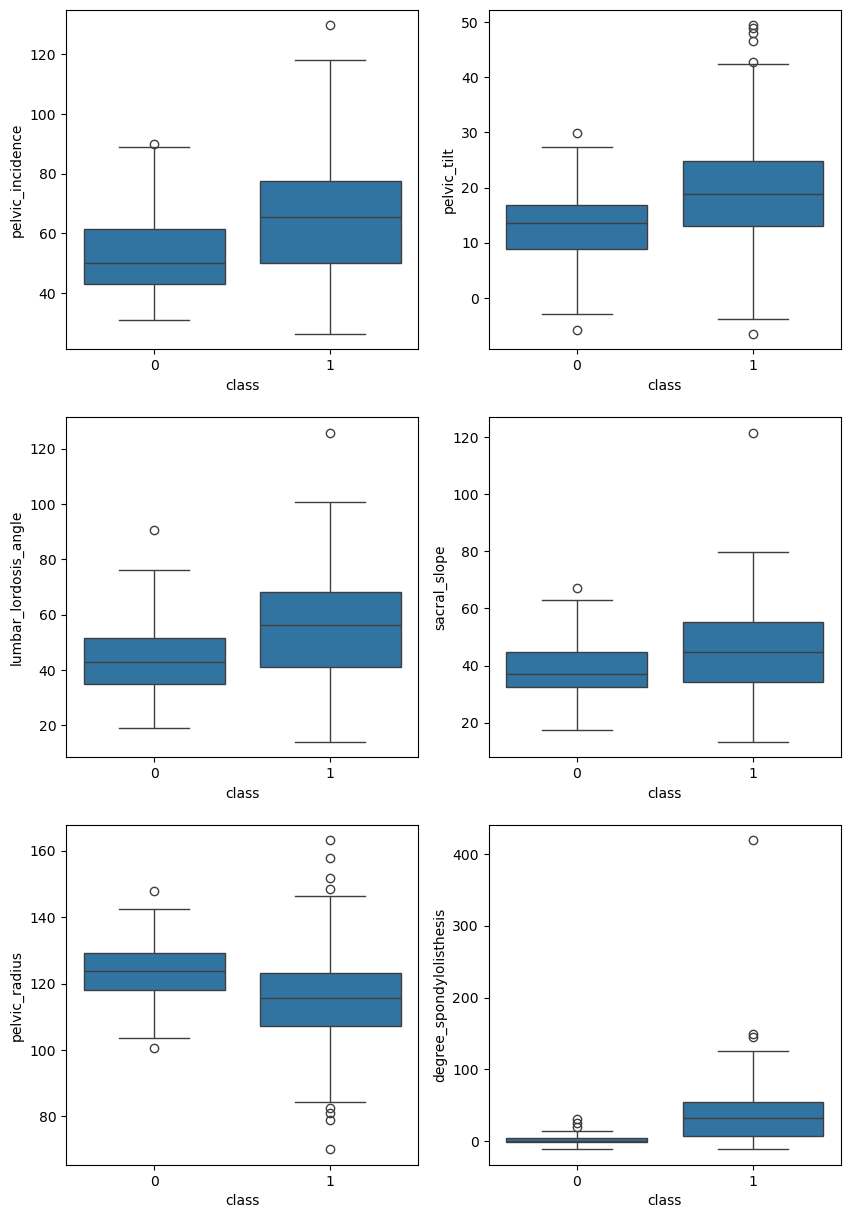

In [11]:
#boxplots for each of the independent variables
fig, axes = plt.subplots(3,2,figsize = (10,15))
cols = df.columns.values
for x in range(6):
    sns.boxplot(x='class', y = df.columns[x], data = df,ax=axes[x // 2, x % 2])
plt.show()

In [12]:
df['class'].value_counts()
#normal = 1 and abormonal = 0

class
1    210
0    100
Name: count, dtype: int64

In [13]:
class0 = df['class'].values == 0 #normal
df_0 =df[class0]

In [14]:
class1 = df['class'].values == 1 #abnormal
df_1 =df[class1]

In [15]:
# picking e first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

#train
train_0 = df_0.head(n= 70)
train_1 = df_1.head(n=140)
frames = [train_0,train_1]
train_data = pd.concat(frames)

#test
test_0 = df_0.tail(n=30)
test_1 = df_1.tail(n=70)
frames = [test_0,test_1]
test_data = pd.concat(frames)


In [16]:
display(train_0.shape) #normal train 
display(test_0.shape) #normal test
display(train_1.shape) #abnormal train
display(test_1.shape) #abnormal test
display(train_data.shape) #normal+abnormal train
display(test_data.shape) #normal+abnormal test

(70, 7)

(30, 7)

(140, 7)

(70, 7)

(210, 7)

(100, 7)

In [17]:
# Seprating dependent and independent features
X_train = train_data.drop(['class'], axis = 1)
X_test = test_data.drop(['class'], axis = 1)

y_train = train_data['class']
y_test = test_data['class']

# Classifciation using KNN

**With Euclideam Metric**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn import metrics

In [19]:
# Function to train and predict with KNN for a given k
def knn_predict(k, X_train, X_test, y_train, y_test):
    # Initialize the KNN model with Euclidean metric
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    return y_pred

# Test the function with an example k
y_pred_example = knn_predict(k=5, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

print("KNN prediction function works successfully.")


KNN prediction function works successfully.


Evaluate Errors for Different Values of k in Reverse Order

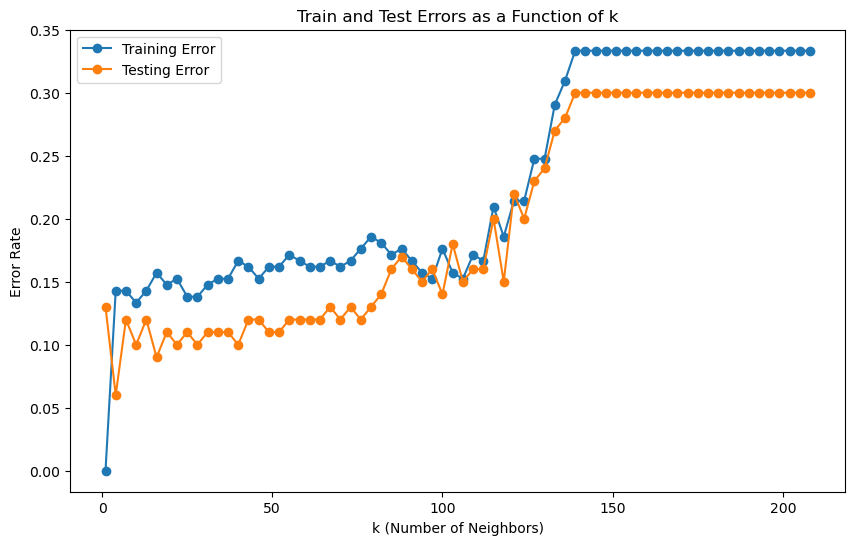

In [20]:
# Initialize lists to store training and testing errors
train_errors = []
test_errors = []
k_values = list(range(208, 0, -3))  # k in reverse order with increments of 3

# Loop over different values of k
for k in k_values:
    # Train the model and predict on both train and test sets
    y_train_pred = knn_predict(k, X_train, X_train, y_train, y_train)
    y_test_pred = knn_predict(k, X_train, X_test, y_train, y_test)
    
    # Calculate training and testing errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot train and test errors as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label="Training Error", marker='o')
plt.plot(k_values, test_errors, label="Testing Error", marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Error Rate")
plt.title("Train and Test Errors as a Function of k")
plt.legend()
plt.show()


Determine the Optimal k (k) and Evaluate the Model 

In [21]:
# Find k* with the lowest test error
optimal_k = k_values[np.argmin(test_errors)]
print(f"The optimal k (k*) with the lowest test error is: {optimal_k}")

# Evaluate the model at k*
y_pred_optimal = knn_predict(optimal_k, X_train, X_test, y_train, y_test)

# Compute and display evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_optimal, average='binary')

print("Confusion Matrix:")
print(conf_matrix)
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"True Negative Rate: {true_negative_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1_score:.2f}")


The optimal k (k*) with the lowest test error is: 4
Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.99
True Negative Rate: 0.83
Precision: 0.93
F1 Score: 0.96


Plot Learning Curve (Test Error Rate vs. Training Set Size)

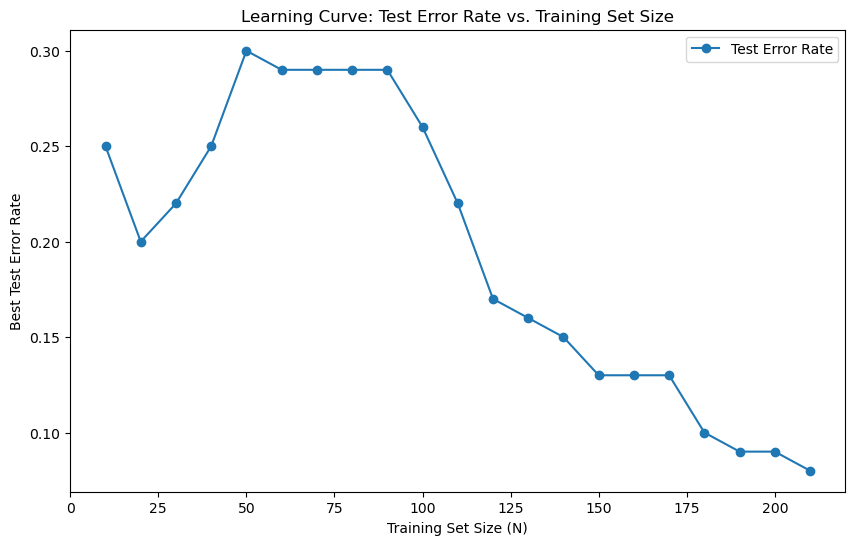

In [22]:
# Define the range of training set sizes and corresponding k values
train_sizes = range(10, 211, 10)
test_errors_vs_size = []

# Iterate over different training set sizes
for N in train_sizes:
    # Select the first N samples from each class to create a balanced subset
    subset_X_train = pd.concat([X_train[y_train == 0].iloc[:N//3], X_train[y_train == 1].iloc[:N - N//3]])
    subset_y_train = pd.concat([y_train[y_train == 0].iloc[:N//3], y_train[y_train == 1].iloc[:N - N//3]])
    
    # Find the optimal k for this subset (increment by 5)
    subset_k_values = list(range(1, N, 5))
    subset_errors = []
    
    for k in subset_k_values:
        y_subset_pred = knn_predict(k, subset_X_train, X_test, subset_y_train, y_test)
        subset_error = 1 - accuracy_score(y_test, y_subset_pred)
        subset_errors.append(subset_error)
    
    # Store the minimum test error for this subset size
    min_subset_error = min(subset_errors)
    test_errors_vs_size.append(min_subset_error)

# Plot the Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_errors_vs_size, label="Test Error Rate", marker='o')
plt.xlabel("Training Set Size (N)")
plt.ylabel("Best Test Error Rate")
plt.title("Learning Curve: Test Error Rate vs. Training Set Size")
plt.legend()
plt.show()


**With Minkowski and Mahalanobis Distance**

In [28]:
def knn_test_metric(metric, k, p=None, V=None):
    """
    Function to train and evaluate KNN using specified metric.
    - metric: distance metric ('minkowski', 'chebyshev', or 'mahalanobis')
    - k: number of neighbors
    - p: parameter for Minkowski distance (optional)
    - V: covariance matrix for Mahalanobis distance (optional)
    """
    # Initialize KNN model based on metric
    if metric == 'minkowski' and p is not None:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p)
    elif metric == 'mahalanobis' and V is not None:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, metric_params={'V': V})
    elif metric == 'chebyshev':
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    else:
        raise ValueError("Unsupported metric or missing parameters for specified metric.")
    
    # Fit the model and calculate test error
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    return test_error


Minkowski Distance: Manhattan Distance with p=1


In [25]:
# Set k values for search
k_values = list(range(1, 197, 5))

# Initialize variables to track best results
best_k_manhattan = None
lowest_error_manhattan = float('inf')

# Test KNN with Manhattan distance (p = 1)
for k in k_values:
    error = knn_test_metric(metric='minkowski', k=k, p=1)
    if error < lowest_error_manhattan:
        lowest_error_manhattan = error
        best_k_manhattan = k

print(f"Best k for Manhattan Distance (p=1): {best_k_manhattan}, Test Error: {lowest_error_manhattan:.4f}")


Best k for Manhattan Distance (p=1): 1, Test Error: 0.1100


Minkowski Distance with log10(p) ∈{0.1, 0.2, 0.3, . . . , 1}

In [26]:
# Set values for log10(p) and initialize tracking
log10_p_values = np.arange(0.1, 1.1, 0.1)
best_p = None
lowest_error_p = float('inf')

# Loop over different values of log10(p)
for log10_p in log10_p_values:
    p = 10 ** log10_p
    error = knn_test_metric(metric='minkowski', k=best_k_manhattan, p=p)
    if error < lowest_error_p:
        lowest_error_p = error
        best_p = p

print(f"Best p (log10 scale) for Minkowski Distance: {np.log10(best_p):.1f}, Test Error: {lowest_error_p:.4f}")


Best p (log10 scale) for Minkowski Distance: 0.7, Test Error: 0.1100


Chebyshev Distance (p→∞)

In [29]:
# Test KNN with Chebyshev Distance
best_k_chebyshev = None
lowest_error_chebyshev = float('inf')

for k in k_values:
    error = knn_test_metric(metric='chebyshev', k=k)
    if error < lowest_error_chebyshev:
        lowest_error_chebyshev = error
        best_k_chebyshev = k

print(f"Best k for Chebyshev Distance: {best_k_chebyshev}, Test Error: {lowest_error_chebyshev:.4f}")


Best k for Chebyshev Distance: 16, Test Error: 0.0800


**Mahalanobis Distance**

In [32]:
from numpy.linalg import inv

# Recalculate the inverse covariance matrix for Mahalanobis distance
V = np.cov(X_train.T)
VI = inv(V)  # Inverse of the covariance matrix

def knn_test_metric(metric, k, p=None, VI=None):
    """
    Function to train and evaluate KNN using the specified metric.
    - metric: distance metric ('minkowski', 'chebyshev', or 'mahalanobis')
    - k: number of neighbors
    - p: parameter for Minkowski distance (optional)
    - VI: inverse covariance matrix for Mahalanobis distance (optional)
    """
    # Initialize KNN model based on the metric
    if metric == 'minkowski' and p is not None:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p)
    elif metric == 'mahalanobis' and VI is not None:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, metric_params={'VI': VI})
    elif metric == 'chebyshev':
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    else:
        raise ValueError("Unsupported metric or missing parameters for specified metric.")
    
    # Fit the model and calculate test error
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    return test_error


In [33]:
# Test KNN with Mahalanobis Distance
best_k_mahalanobis = None
lowest_error_mahalanobis = float('inf')

for k in k_values:
    error = knn_test_metric(metric='mahalanobis', k=k, VI=VI)  # Pass the inverse covariance matrix (VI)
    if error < lowest_error_mahalanobis:
        lowest_error_mahalanobis = error
        best_k_mahalanobis = k

print(f"Best k for Mahalanobis Distance: {best_k_mahalanobis}, Test Error: {lowest_error_mahalanobis:.4f}")


Best k for Mahalanobis Distance: 1, Test Error: 0.1400


Weighted Voting with Different Distance Metrics
Here, I implement KNN with weighted voting using inverse distance weighting. I test with Euclidean, Manhattan, and Chebyshev distances and find the best k that minimizes test error for each metric.

In [34]:
# Define function for KNN with weighted voting
def knn_weighted_test(metric, k, p=None):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    return test_error

# Initialize tracking for each distance metric
metrics = ['euclidean', 'minkowski', 'chebyshev']
best_k_weighted = {}
lowest_error_weighted = {}

for metric in metrics:
    best_k = None
    lowest_error = float('inf')
    
    for k in k_values:
        p = 1 if metric == 'minkowski' else None  # p=1 for Manhattan if metric is 'minkowski'
        error = knn_weighted_test(metric=metric, k=k, p=p)
        
        if error < lowest_error:
            lowest_error = error
            best_k = k

    best_k_weighted[metric] = best_k
    lowest_error_weighted[metric] = lowest_error

# Print the best k and test error for weighted voting
for metric in metrics:
    print(f"Best k for {metric} with weighted voting: {best_k_weighted[metric]}, Test Error: {lowest_error_weighted[metric]:.4f}")


Best k for euclidean with weighted voting: 6, Test Error: 0.1000
Best k for minkowski with weighted voting: 26, Test Error: 0.1000
Best k for chebyshev with weighted voting: 16, Test Error: 0.1100


# Lowest Error

In [35]:
# Function to calculate training error for a given k and metric
def knn_training_error(metric, k, p=None):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=p, weights='distance')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    return train_error

# Track lowest training error across all metrics and values of k
lowest_train_error = float('inf')
best_train_metric = None
best_train_k = None

for metric in metrics:
    for k in k_values:
        p = 1 if metric == 'minkowski' else None
        train_error = knn_training_error(metric=metric, k=k, p=p)
        
        if train_error < lowest_train_error:
            lowest_train_error = train_error
            best_train_metric = metric
            best_train_k = k

print(f"Lowest training error achieved: {lowest_train_error:.4f}")
print(f"Achieved with metric: {best_train_metric} and k: {best_train_k}")


Lowest training error achieved: 0.0000
Achieved with metric: euclidean and k: 1
